<a href="https://colab.research.google.com/github/abhilash1910/AI-Geometric-Learning/blob/master/Chapter_2_Understanding_the_data/InformationGeometry_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

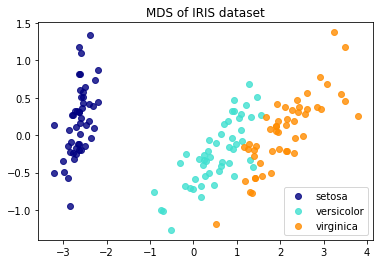

In [8]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.datasets import load_iris


class MDS():
  def __init__(self,D,n_components=[]):
    self.D=D
    self.n=len(D)
    self.n_components=n_components
  
  def one_centering(self):
    I=np.identity(self.n)
    O=np.ones((self.n,self.n))
    self.H=I-O/self.n
    return self.H

  def double_centering(self):
    self.H=-self.H.dot(self.D**2).dot(self.H)/2
    return self.H
  
  def get_eigens(self):
    self.evals,self.evecs=np.linalg.eigh(self.H)
    idx=np.argsort(self.evals)[::-1]
    self.evals=self.evals[idx]
    self.evecs=self.evecs[:,idx]
    w,=np.where(self.evals>0)
    if self.n_components!=[]:
      evs=self.evals
      w_modif=evs.argsort()[-self.n_components:][::-1]
      if np.any(self.evals[w_modif]<0):
        print(f"Not possible to get components  for the {self.n_components}")
        return []
    self.L=np.diag(np.sqrt(self.evals[w]))
    self.V=self.evecs[:,w]
    self.Y= self.V.dot(self.L)
    return self.Y


iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
D = distance.cdist(X, X, 'euclidean')

mds=MDS(D,2)
H=mds.one_centering()
H=mds.double_centering()
Y=mds.get_eigens()
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Y[y == i, 0], Y[y == i, 1], alpha=.8, color=color,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('MDS of IRIS dataset')
plt.show()